In [185]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics, cross_validation, feature_selection

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

#pd.set_option('display.max_rows', 10)
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 10)

In [186]:
df = pd.read_csv(os.path.join('..', 'CODE', '2016-FCC-New-Coders-Survey-Data.csv'))

In [187]:
df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,...,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,...,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,...,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,...,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,...,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,...,NaN,NaN,"some college credit, no degree",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15615,39.0,0.0,NaN,NaN,NaN,...,NaN,NaN,bachelor's degree,Chemistry,NaN
15616,27.0,0.0,NaN,NaN,NaN,...,NaN,NaN,bachelor's degree,Electrical Engineering,NaN
15617,37.0,0.0,NaN,NaN,NaN,...,NaN,NaN,bachelor's degree,Chemistry,NaN
15618,26.0,0.0,NaN,NaN,NaN,...,NaN,NaN,master's degree (non-professional),Math,NaN


In [188]:
df.columns

Index([u'Age', u'AttendedBootcamp', u'BootcampFinish', u'BootcampFullJobAfter',
       u'BootcampLoanYesNo', u'BootcampMonthsAgo', u'BootcampName',
       u'BootcampPostSalary', u'BootcampRecommend', u'ChildrenNumber',
       ...
       u'ResourceSoloLearn', u'ResourceStackOverflow', u'ResourceTreehouse',
       u'ResourceUdacity', u'ResourceUdemy', u'ResourceW3Schools',
       u'ResourceYouTube', u'SchoolDegree', u'SchoolMajor', u'StudentDebtOwe'],
      dtype='object', length=113)

In [189]:
df.corr()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,...,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
Age,1.000000,0.052738,0.100825,-0.276556,-0.010962,...,NaN,NaN,NaN,NaN,0.118368
AttendedBootcamp,0.052738,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.012080
BootcampFinish,0.100825,NaN,1.000000,NaN,0.040286,...,NaN,NaN,NaN,NaN,0.006506
BootcampFullJobAfter,-0.276556,NaN,NaN,1.000000,-0.001930,...,NaN,NaN,NaN,NaN,0.051056
BootcampLoanYesNo,-0.010962,NaN,0.040286,-0.001930,1.000000,...,NaN,NaN,NaN,NaN,-0.085362
...,...,...,...,...,...,...,...,...,...,...,...
ResourceUdacity,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
ResourceUdemy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
ResourceW3Schools,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
ResourceYouTube,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [190]:
df.BootcampName.unique()

array([nan, 'Codify Academy', 'DaVinci Coders', 'Coder Foundry',
       'General Assembly', 'Thinkful', 'Flatiron School', 'DevMountain',
       'The Iron Yard', 'Codeup', 'Code Fellows', 'Bloc.io',
       'The Firehose Project', 'Prime Digital Academy',
       'Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
       'Galvanize', 'Ada', 'Skillcrush', 'Hack Reactor', 'Coding House',
       'Software Guild', 'BrainStation', 'Fullstack Academy',
       'Makers Academy', 'Turing', 'Lighthouse Labs', 'MakerSquare',
       'Wyncode', 'Dev Bootcamp', 'Bit Bootcamp', 'Coder Camps',
       'IronHack', 'Epicodus', 'Tech Talent South', 'Coding Dojo',
       'PDX Code Guild', 'Hackbright Academy', 'CareerFoundry',
       'LearningFuze', 'Zip Code Wilmington', 'Launch Academy',
       'LAMP Camp', 'Nashville Software School', 'RefactorU',
       'CodeCore Bootcamp', 'Sabio.la', 'Grand Circus', 'App Academy',
       'Devschool', 'Learn.Modern-Developer', 'Grace Hopper 

In [191]:
model = smf.ols(formula = 'BootcampFullJobAfter ~ AttendedBootcamp ', data = df).fit()
model.summary()


#NEED TO TURN INTO BINARY VARIABLES

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     BootcampFullJobAfter   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       inf
Date:                  Wed, 15 Jun 2016   Prob (F-statistic):                nan
Time:                          23:13:01   Log-Likelihood:                -451.73
No. Observations:                   635   AIC:                             905.5
Df Residuals:                       634   BIC:                             909.9
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.2921      0.010     29.849      0.000         0.273     0.311
AttendedBootcamp     0.2921      0.010     29.849      0.000         0.273     0.311
==============================================================================
Omnibus:                       12.001   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.002   Jarque-Bera (JB):              106.195
Skew:                          -0.342   Prob(JB):                     8.71e-24
Kurtosis:                       1.117   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Look at 'Age'

In [192]:
len(df.Age.dropna())

13613

In [193]:
len(df.Age.isnull())

15620

In [194]:
len(df.Age)

15620

## Look at 'AttendedBootcamp'

In [195]:
df.AttendedBootcamp.unique()

array([  0.,  nan,   1.])

In [196]:
df.AttendedBootcamp.value_counts()

0.0    14427
1.0      953
Name: AttendedBootcamp, dtype: int64

In [197]:
df.AttendedBootcamp.count()

15380

## Look at 'Bootcamp Finish'

In [198]:
df.BootcampFinish.unique()

array([ nan,   1.,   0.])

In [199]:
df.BootcampFinish.value_counts()

1.0    643
0.0    290
Name: BootcampFinish, dtype: int64

In [200]:
len(df.BootcampFinish.dropna())

933

## Look at 'BootcampFullJobAfter'

In [201]:
df.BootcampFullJobAfter.unique()

array([ nan,   0.,   1.])

In [202]:
df.BootcampFullJobAfter.value_counts()

1.0    371
0.0    264
Name: BootcampFullJobAfter, dtype: int64

In [203]:
len(df.BootcampFullJobAfter.dropna())

635

In [204]:
df.corr().BootcampFullJobAfter

Age                    -0.276556
AttendedBootcamp             NaN
BootcampFinish               NaN
BootcampFullJobAfter    1.000000
BootcampLoanYesNo      -0.001930
                          ...   
ResourceUdacity              NaN
ResourceUdemy                NaN
ResourceW3Schools            NaN
ResourceYouTube              NaN
StudentDebtOwe          0.051056
Name: BootcampFullJobAfter, dtype: float64

## Look at 'ExpectedEarning'

In [205]:
len(df.ExpectedEarning.dropna())

6077

## Look at 'BootcampPostSalary'

In [206]:
len(df.BootcampPostSalary.dropna())

330

## Look at 'IsSoftwareDev'

In [207]:
df.IsSoftwareDev.value_counts()

0.0    11234
1.0     4303
Name: IsSoftwareDev, dtype: int64

## Look at 'MonthsProgramming'

In [208]:
df.MonthsProgramming.value_counts()

12.0     1549
6.0      1345
1.0      1253
3.0      1190
2.0      1119
         ... 
145.0       1
146.0       1
148.0       1
157.0       1
340.0       1
Name: MonthsProgramming, dtype: int64

# Linear Modeling with `sklearn`  

*from codealong 7*

Look At:
    - Age
    - AttendedBootcamp (y/n)
    - BootcampFinish (y/n)
    - BootcampFullJobAfter (y/n)
    - ExpectedEarning
    - Gender
    - BootcampPostSalary
    - IsSoftwareDev
    - MonthsProgramming

In [209]:
subset_df = df.dropna(axis = 'index', subset = ['Age', 'AttendedBootcamp', 'ExpectedEarning', 'BootcampFinish', 'BootcampFullJobAfter', 'ExpectedEarning', 'Gender', 'BootcampPostSalary', 'IsSoftwareDev', 'MonthsProgramming'])

In [210]:
subset_df

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,...,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
4585,47.0,1.0,1.0,1.0,0.0,...,NaN,NaN,bachelor's degree,Computer Software Engineering,NaN
4800,26.0,1.0,1.0,1.0,1.0,...,NaN,NaN,"trade, technical, or vocational training",NaN,NaN
4823,28.0,1.0,1.0,1.0,0.0,...,NaN,NaN,"professional degree (MBA, MD, JD, etc.)",African Studies,NaN
5861,42.0,1.0,1.0,1.0,0.0,...,NaN,NaN,"professional degree (MBA, MD, JD, etc.)",Public Administration,30000.0
6651,34.0,1.0,1.0,1.0,0.0,...,NaN,NaN,bachelor's degree,Natural Resources Conservation,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14097,30.0,1.0,1.0,1.0,1.0,...,NaN,NaN,bachelor's degree,Liberal Arts,NaN
14098,43.0,1.0,1.0,1.0,0.0,...,NaN,NaN,"some college credit, no degree",NaN,50000.0
14103,28.0,1.0,1.0,1.0,0.0,...,NaN,NaN,bachelor's degree,Robotics and Automation Engineering,NaN
14113,20.0,1.0,1.0,1.0,1.0,...,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN


In [211]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X, y)

    print 'F-statistic (performed for each regressor independently)'
    print '- F-value', feature_selection.f_regression(X, y)[0]
    print '- p-value', feature_selection.f_regression(X, y)[1]
    print 'R^2 =', model.score(X, y)
    print 'Coefficients'
    print '- beta_0 (intercept) =', model.intercept_
    print '- beta_n (n > 0)     =', model.coef_

### BootcampPostSalary ~ Age with `statsmodels`

In [212]:
smf.ols(formula = 'BootcampPostSalary ~ Age', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.345
Date:                Wed, 15 Jun 2016   Prob (F-statistic):              0.154
Time:                        23:13:02   Log-Likelihood:                -153.66
No. Observations:                  13   AIC:                             311.3
Df Residuals:                      11   BIC:                             312.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.186e+05   4.04e+04      2.935      0.014      2.97e+04  2.08e+05
Age        -1785.1071   1165.682     -1.531      0.154     -4350.755   780.541
==============================================================================
Omnibus:                        6.699   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                3.471
Skew:                           1.218   Prob(JB):                        0.176
Kurtosis:                       3.689   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BootcampPostSalary ~ Age with `sklearn` (Simple Linear Modeling)

In [213]:
X = subset_df[ ['Age'] ]
y = subset_df.BootcampPostSalary

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 2.34513854]
- p-value [ 0.15391303]
R^2 = 0.17572980126
Coefficients
- beta_0 (intercept) = 118622.445643
- beta_n (n > 0)     = [-1785.10707863]


### BootcampPostSalary ~ Age + MonthsProgramming with `statsmodels`

In [214]:
smf.ols(formula = 'BootcampPostSalary ~ Age + MonthsProgramming', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2.341
Date:                Wed, 15 Jun 2016   Prob (F-statistic):              0.147
Time:                        23:13:02   Log-Likelihood:                -152.42
No. Observations:                  13   AIC:                             310.8
Df Residuals:                      10   BIC:                             312.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.223e+05   3.86e+04      3.168      0.010      3.63e+04  2.08e+05
Age               -1475.2106   1131.748     -1.303      0.222     -3996.901  1046.480
MonthsProgramming  -686.0792    473.290     -1.450      0.178     -1740.636   368.477
==============================================================================
Omnibus:                        5.524   Durbin-Watson:                   2.965
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                2.752
Skew:                           1.097   Prob(JB):                        0.253
Kurtosis:                       3.518   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BootcampPostSalary ~ Age + MonthsProgramming with `sklearn` (Multiple Linear Modeling)

In [215]:
X = subset_df[ ['Age', 'MonthsProgramming'] ]
y = subset_df.BootcampPostSalary

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 2.34513854  2.80400347]
- p-value [ 0.15391303  0.12219244]
R^2 = 0.318859605907
Coefficients
- beta_0 (intercept) = 122348.94268
- beta_n (n > 0)     = [-1475.21057566  -686.07922862]


## Look at Gender

In [216]:
subset_df.Gender.value_counts()

male      8
female    5
Name: Gender, dtype: int64

## ???? 

In [217]:
df.Gender.value_counts()

male           10766
female          2840
genderqueer       66
agender           38
trans             36
Name: Gender, dtype: int64

###  --> LOOKING AT GENDER IN FULL DATASET

In [218]:
df.Gender.unique()

array(['male', 'female', nan, 'genderqueer', 'agender', 'trans'], dtype=object)

In [219]:
len(df.Gender.dropna())

13746

In [220]:
#look at gender distribution 
print np.nan, df.Gender.isnull().sum()
for gender in np.sort(df.Gender.dropna().unique()):
    print gender, len(df[df.Gender == gender])

nan 1874
agender 38
female 2840
genderqueer 66
male 10766
trans 36


In [223]:
df = df[df.Gender.isin(['agender', 'female', 'genderqueer', 'male', 'trans'])]

#counts for gender - NAN values

In [224]:
print np.nan, df.Gender.isnull().sum()
df.Gender.value_counts()

#removed all NAN values

nan 0


male           10766
female          2840
genderqueer       66
agender           38
trans             36
Name: Gender, dtype: int64

In [229]:
df.Gender.value_counts()

male           10766
female          2840
genderqueer       66
agender           38
trans             36
Name: Gender, dtype: int64

In [230]:
df.Gender.unique()

array(['male', 'female', 'genderqueer', 'agender', 'trans'], dtype=object)

### CREATE DUMMY VARIABLES FOR GENDER

*from code along 7*

In [231]:
gender_df = pd.get_dummies(df.Gender, prefix = 'G')

In [233]:
gender_df

,G_agender,G_female,G_genderqueer,G_male,G_trans
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
15615,0.0,0.0,0.0,1.0,0.0
15616,0.0,0.0,0.0,1.0,0.0
15617,0.0,0.0,0.0,1.0,0.0
15618,0.0,0.0,0.0,1.0,0.0


In [235]:
df = df.join([gender_df])

#joining dummy variables into dataset

In [236]:
df.drop('Gender', axis = 1, inplace = True)
#removing the column 'Gender'

### BootcampPostSalary as a function of G_agender, G_female, G_genderqueer, G_trans

In [237]:
smf.ols(formula = 'BootcampPostSalary ~ G_agender + G_female + G_genderqueer + G_trans', data = df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.021
Date:                Wed, 15 Jun 2016   Prob (F-statistic):              0.383
Time:                        23:25:29   Log-Likelihood:                -3412.3
No. Observations:                 296   AIC:                             6833.
Df Residuals:                     292   BIC:                             6847.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      6.127e+04   1869.345     32.778      0.000      5.76e+04   6.5e+04
G_agender       7.36e-12   1.09e-10      0.067      0.946     -2.08e-10  2.22e-10
G_female       5112.9200   2938.256      1.740      0.083      -669.924  1.09e+04
G_genderqueer -1273.9371   2.48e+04     -0.051      0.959     -5.01e+04  4.75e+04
G_trans       -1273.9371   2.48e+04     -0.051      0.959     -5.01e+04  4.75e+04
==============================================================================
Omnibus:                       20.680   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.592
Skew:                           0.536   Prob(JB):                     1.68e-06
Kurtosis:                       4.003   Cond. No.                     2.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Calculate Odds Ratio 

*from unit project 3*

### Male gender & BootcampFullJobAfter

In [242]:
pd.crosstab(df.G_male, df.BootcampFullJobAfter, margins=True)

BootcampFullJobAfter,0.0,1.0,All
G_male,,,
0.0,94,137,2980
1.0,131,190,10766
All,225,327,13746


**Odds of being male and getting a full job after: 190:131**

**Odds of not being male and getting a full job after:  137:94**

**ODDS RATIO:**

((191/131)/(137/94)) = 1.00039

    odds of getting a job after if male vs. if not male is basically even (1:1) 

### Female gender & BootcampFullJobAfter

In [257]:
pd.crosstab(df.G_female, df.BootcampFullJobAfter, margins=True)

BootcampFullJobAfter,0.0,1.0,All
G_female,,,
0.0,135,193,10906
1.0,90,134,2840
All,225,327,13746


**Odds of being female and getting a full job after: 134:90**

**Odds of not being female and getting a full job after:  193:135**

**ODDS RATIO:**

((134/90)/(193/135)) = 1.04

    odds of getting a job after if female vs. if not female is 1.04:1

In [268]:
df.corr().G_female

Age                     0.084175
AttendedBootcamp        0.116462
BootcampFinish          0.048869
BootcampFullJobAfter    0.009793
BootcampLoanYesNo      -0.043250
                          ...   
G_agender              -0.026868
G_female                1.000000
G_genderqueer          -0.035445
G_male                 -0.969941
G_trans                -0.026149
Name: G_female, dtype: float64

### Look at Gender & AttendedBootcamp:

In [281]:
pd.crosstab(df.G_female, df.AttendedBootcamp, margins=True)

AttendedBootcamp,0.0,1.0,All
G_female,,,
0.0,10305,507,10906
1.0,2489,326,2840
All,12794,833,13746


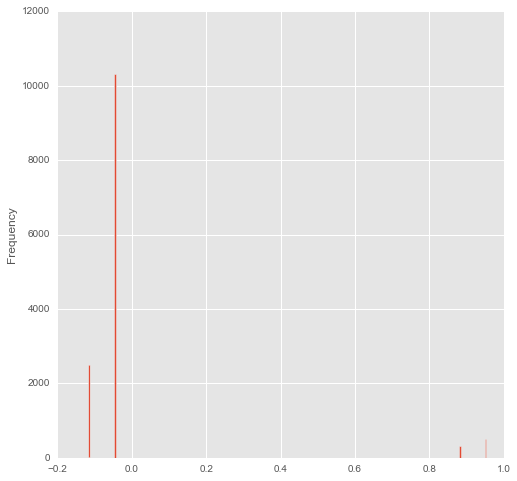

In [285]:
model = smf.ols(formula = 'AttendedBootcamp ~ G_female', data = df).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

plt.show()

### Look at Gender_FEMALE and AttendedBootcamp as a predictor of BootcampPostSalary: 

In [274]:
smf.ols(formula = 'BootcampPostSalary ~ G_female + AttendedBootcamp', data = df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.080
Date:                Wed, 15 Jun 2016   Prob (F-statistic):             0.0803
Time:                        23:46:44   Log-Likelihood:                -3412.3
No. Observations:                 296   AIC:                             6829.
Df Residuals:                     294   BIC:                             6836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         3.063e+04    926.218     33.070      0.000      2.88e+04  3.25e+04
G_female          5127.3148   2921.567      1.755      0.080      -622.521  1.09e+04
AttendedBootcamp  3.063e+04    926.218     33.070      0.000      2.88e+04  3.25e+04
==============================================================================
Omnibus:                       20.739   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.671
Skew:                           0.537   Prob(JB):                     1.62e-06
Kurtosis:                       4.003   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [277]:
smf.ols(formula = 'BootcampPostSalary ~ AttendedBootcamp', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Jun 2016   Prob (F-statistic):                nan
Time:                        23:47:36   Log-Likelihood:                -3413.8
No. Observations:                 296   AIC:                             6830.
Df Residuals:                     295   BIC:                             6833.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         3.166e+04    718.753     44.049      0.000      3.02e+04  3.31e+04
AttendedBootcamp  3.166e+04    718.753     44.049      0.000      3.02e+04  3.31e+04
==============================================================================
Omnibus:                       17.948   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.677
Skew:                           0.485   Prob(JB):                     1.19e-05
Kurtosis:                       3.947   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [290]:
df.corr().AttendedBootcamp

Age                     0.052596
AttendedBootcamp        1.000000
BootcampFinish               NaN
BootcampFullJobAfter         NaN
BootcampLoanYesNo            NaN
                          ...   
G_agender              -0.001541
G_female                0.116462
G_genderqueer           0.009010
G_male                 -0.116348
G_trans                 0.004770
Name: AttendedBootcamp, dtype: float64

In [294]:
smf.ols(formula = 'AttendedBootcamp ~ G_female', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AttendedBootcamp   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           2.30e-42
Time:                        00:04:27   Log-Likelihood:                 229.14
No. Observations:               13627   AIC:                            -454.3
Df Residuals:                   13625   BIC:                            -439.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0469      0.002     20.491      0.000         0.042     0.051
G_female       0.0689      0.005     13.687      0.000         0.059     0.079
==============================================================================
Omnibus:                     9781.848   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99932.101
Skew:                           3.592   Prob(JB):                         0.00
Kurtosis:                      14.153   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
smf.ols(formula = 'BootcampPostSalary ~ G_female + Age', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     BootcampPostSalary   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.843
Date:                Thu, 16 Jun 2016   Prob (F-statistic):              0.160
Time:                        00:05:44   Log-Likelihood:                -3398.9
No. Observations:                 295   AIC:                             6804.
Df Residuals:                     292   BIC:                             6815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.425e+04   7094.684      7.646      0.000      4.03e+04  6.82e+04
G_female    4842.2845   2917.872      1.660      0.098      -900.442  1.06e+04
Age          233.9920    228.532      1.024      0.307      -215.786   683.770
==============================================================================
Omnibus:                       18.541   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.221
Skew:                           0.503   Prob(JB):                     9.07e-06
Kurtosis:                       3.936   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Age & BootcampFullJobAfter

In [287]:
pd.crosstab(df.Age, df.BootcampFullJobAfter, margins=True)m

BootcampFullJobAfter,0.0,1.0,All
Age,,,
18.0,0,1,292
20.0,1,2,505
21.0,2,7,580
22.0,4,11,634
23.0,5,15,750
...,...,...,...
56.0,1,1,31
57.0,1,2,31
58.0,2,0,22


#### NEED TO CREATE DUMMY VARIABLES FOR AGE??

### Multicollinearity

*code along 6*

In [289]:
df[ ['BootcampFullJobAfter', 'BootcampFinish', 'AttendedBootcamp', 'G_female' ] ].corr()

,BootcampFullJobAfter,BootcampFinish,AttendedBootcamp,G_female
BootcampFullJobAfter,1.000000,NaN,NaN,0.009793
BootcampFinish,NaN,1.000000,NaN,0.048869
AttendedBootcamp,NaN,NaN,1.000000,0.116462
G_female,0.009793,0.048869,0.116462,1.000000


  ### drop NAN values for the above (similar to Gender?)

# Look at school degrees & majors

    ## WAY TO CODE SCHOOL DEGREE AND/OR MAJOR?

In [297]:
df.SchoolMajor.unique()

array([nan, 'Cinematography And Film', 'English', 'Computer Science',
       'Education', 'Business Administration', 'Mechanical Engineering',
       'Math', 'Economics', 'Music', 'Geology', 'Political Science',
       'Physics', 'Information Technology', 'Communications', 'Chemistry',
       'Linguistics', 'Sociology', 'Sports Medicine', 'Graphic Design',
       'Criminal Justice', 'Computer Networking', 'Liberal Arts',
       'Electrical Engineering', 'Animation', 'Biology',
       'Public Administration', 'Anthropology', 'International Business',
       'Aviation', 'Engineering', 'Psychology', 'Web Design', 'Finance',
       'Environmental Science', 'Systems Engineering',
       'Advertising and Marketing', 'Creative Writing', 'Philosophy',
       'History', 'International Relations', 'Civil Engineering',
       'Computer Aided Design (CAD)', 'Industrial Design', 'Accounting',
       'Kinesiology And Exercise Science', 'Elementary Education',
       'Software Engineering', 'Operatio

In [298]:
df.SchoolMajor.value_counts()

Computer Science                                         1380
Information Technology                                    405
Business Administration                                   283
Economics                                                 252
Electrical Engineering                                    220
                                                         ... 
Diesel Mechanic                                             1
Public Health Studies                                       1
Astronomy                                                   1
Forestry                                                    1
International Relations and National Security Studies       1
Name: SchoolMajor, dtype: int64

In [301]:
df.SchoolDegree.unique()

array(['some college credit, no degree',
       'high school diploma or equivalent (GED)', "bachelor's degree",
       "master's degree (non-professional)",
       'professional degree (MBA, MD, JD, etc.)',
       'trade, technical, or vocational training', "associate's degree",
       'some high school', 'Ph.D.', 'no high school (secondary school)',
       nan], dtype=object)

In [320]:
for degree in df.SchoolDegree:
    print degree

some college credit, no degree
some college credit, no degree
high school diploma or equivalent (GED)
bachelor's degree
some college credit, no degree
bachelor's degree
bachelor's degree
master's degree (non-professional)
bachelor's degree
master's degree (non-professional)
bachelor's degree
some college credit, no degree
bachelor's degree
bachelor's degree
some college credit, no degree
professional degree (MBA, MD, JD, etc.)
bachelor's degree
bachelor's degree
bachelor's degree
some college credit, no degree
master's degree (non-professional)
bachelor's degree
bachelor's degree
bachelor's degree
bachelor's degree
some college credit, no degree
high school diploma or equivalent (GED)
trade, technical, or vocational training
bachelor's degree
master's degree (non-professional)
some college credit, no degree
some college credit, no degree
bachelor's degree
high school diploma or equivalent (GED)
bachelor's degree
high school diploma or equivalent (GED)
high school diploma or equivalent 

In [300]:
df.SchoolDegree.value_counts()

bachelor's degree                           5615
some college credit, no degree              2259
master's degree (non-professional)          1436
high school diploma or equivalent (GED)     1350
some high school                             755
professional degree (MBA, MD, JD, etc.)      688
associate's degree                           649
trade, technical, or vocational training     443
no high school (secondary school)            254
Ph.D.                                        160
Name: SchoolDegree, dtype: int64

In [ ]:
len(df.SchoolDegree.dropna())

# LOOK AT RESOURCES 


*all Y/N*

- ResourceBlogs
- ResourceCodeWars
- ResourceCodecademy
- ResourceCoursera
- ResourceDevTips
- ResourceGoogle
- ResourceKhanAcademy
- ResourceReddit
- ResourceStackOverflow
- ResourceYouTube

# LOOK AT CODEEVENTS

*all Y/N*

- CodeEventBootcamp
- CodeEventCoffee
- CodeEventConferences
- CodeEventDjangoGirls
- CodeEventGirlDev
- CodeEventHackathons
- CodeEventMeetup
- CodeEventNone
- CodeEventOther

In [ ]:
#code the bootcamps people went to into #S